# 「ガウス過程と機械学習」
# P.74 様々なカーネル

In [1]:
using Distributions
using LinearAlgebra
using Plots

In [2]:
x = -2.0:0.02:2.0
θ₁ = 1.0
θ₂ = 1.0;

In [3]:
# 線形カーネル
function lr_kernel(x)
    x * x'
end

# 指数カーネル
function exp_kernel(x, θ)
    exp.(- abs.(x .- x') ./ θ)
end

# 周期カーネル
function periodic_kernel(x, θ₁, θ₂)
    exp.(θ₁ .* cos.(abs.(x .- x')) ./ θ₂)
end
;

In [4]:
k1 = lr_kernel(x)
k2 = exp_kernel(x, θ₁)
k3 = periodic_kernel(x, θ₁, θ₂);

MvNormalを使うとカーネル行列が正定置でないためコレスキー分解に失敗したというエラーが表示される。これは、カーネル行列の固有値を計算すると数値的な誤差によって負の値になってしまう（指数カーネルでは負の値にならない）ためである。そこでコレスキー分解を経由せず行列の平方根を計算することでエラーを回避する。

参考：https://yonesuke.github.io/posts/gram_eigen/


In [5]:
@show minimum(eigvals(k1))
@show minimum(eigvals(k2))
@show minimum(eigvals(k3));

minimum(eigvals(k1)) = -9.720241948101095e-14
minimum(eigvals(k2)) = 0.010000277290405094
minimum(eigvals(k3)) = -6.273165217332206e-14


### $K = M^{2}$となる対称行列を求め、$M$と$n$次元の独立標準正規分布に従う行列・ベクトル積を計算することで多次元ガウス分布を生成する

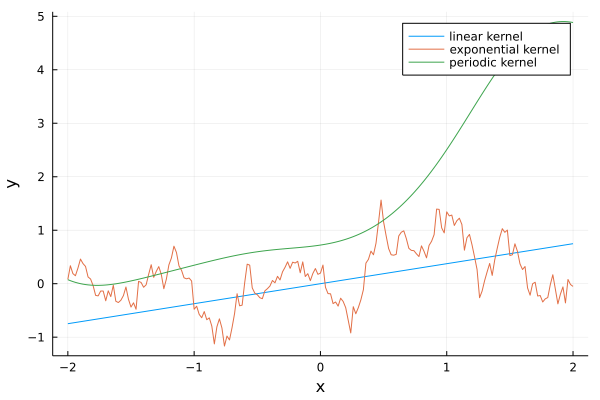

In [6]:
plot(x, sqrt(k1) * randn(length(x)), xlab="x", ylab="y", label="linear kernel")
plot!(x, sqrt(k2) * randn(length(x)), label="exponential kernel")
plot!(x, sqrt(k3) * randn(length(x)), label="periodic kernel")